In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/placement (1).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model=LinearRegression()

In [5]:
model.fit(df['cgpa'].values.reshape(200,1),df['package'])

LinearRegression()

In [6]:
model.coef_

array([0.56959129])

In [7]:
model.intercept_

-0.9856779462557332

In [8]:
model1=LinearRegression()

In [9]:
model1.fit((df['cgpa'].values.reshape(200,1)*2),(df['package']*2))

LinearRegression()

In [10]:
print(model1.coef_,model1.intercept_)

[0.56959129] -1.9713558925114665


In [17]:
model2=LinearRegression()

In [18]:
model2.fit((df['cgpa'].values.reshape(200,1)-2),(df['package']-2))

LinearRegression()

In [19]:
print(model2.coef_,model2.intercept_)

[0.56959129] -1.846495356668227


#`Direct Scaling and Change in Origin with sk learn`

Original Model Coefficients:
Intercept (β₀): 2.2
Slope (β₁): 0.6

Model After Change of Origin (Shifting X by -2):
Intercept (β₀): 3.4
Slope (β₁): 0.6

Model After Change of Scale (Scaling X by *2):
Intercept (β₀): 2.2
Slope (β₁): 0.3


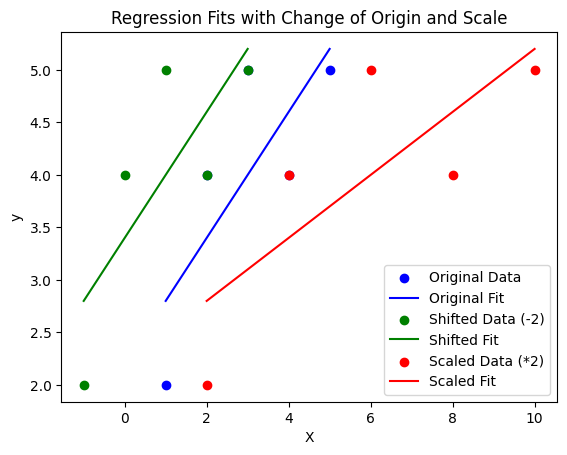

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Original Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Independent variable
y = np.array([2, 4, 5, 4, 5])                # Dependent variable

# Fit the original linear regression model
model_original = LinearRegression()
model_original.fit(X, y)

print("Original Model Coefficients:")
print(f"Intercept (β₀): {model_original.intercept_}")
print(f"Slope (β₁): {model_original.coef_[0]}")

# Step 2: Change of Origin (Shift X by subtracting 2)
X_shifted = X - 2  # Shifted data

# Fit the model on shifted data
model_shifted = LinearRegression()
model_shifted.fit(X_shifted, y)

print("\nModel After Change of Origin (Shifting X by -2):")
print(f"Intercept (β₀): {model_shifted.intercept_}")
print(f"Slope (β₁): {model_shifted.coef_[0]}")

# Step 3: Change of Scale (Multiply X by 2)
X_scaled = X * 2  # Scaled data

# Fit the model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

print("\nModel After Change of Scale (Scaling X by *2):")
print(f"Intercept (β₀): {model_scaled.intercept_}")
print(f"Slope (β₁): {model_scaled.coef_[0]}")

# Visualization to understand the transformations
plt.scatter(X, y, color="blue", label="Original Data")
plt.plot(X, model_original.predict(X), color="blue", label="Original Fit")

plt.scatter(X_shifted, y, color="green", label="Shifted Data (-2)")
plt.plot(X_shifted, model_shifted.predict(X_shifted), color="green", label="Shifted Fit")

plt.scatter(X_scaled, y, color="red", label="Scaled Data (*2)")
plt.plot(X_scaled, model_scaled.predict(X_scaled), color="red", label="Scaled Fit")

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Fits with Change of Origin and Scale")
plt.show()

##`Direct Scaling and Change in Origin with sk learn`

In [39]:
import numpy as np

class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.insert(X, 0, 1, axis=1)

        # Calculate the coefficients (betas)
        betas = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.insert(X, 0, 1, axis=1)

        # Calculate predictions
        y_pred = np.dot(X, np.insert(self.coef_, 0, self.intercept_))
        return y_pred

# Example usage:

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Instantiate the class
model = MeraLR()

# Fit the model
model.fit(X, y)

# Predict
X_test = np.array([[6], [7]])
y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Predicted values: {y_pred}")


Coefficients: [0.6]
Intercept: 2.2000000000000046
Predicted values: [5.8 6.4]


In [40]:
import numpy as np

class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = X - 2
        X = np.insert(X, 0, 1, axis=1)

        # Calculate the coefficients (betas)
        betas = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = X - 2
        X = np.insert(X, 0, 1, axis=1)

        # Calculate predictions
        y_pred = np.dot(X, np.insert(self.coef_, 0, self.intercept_))
        return y_pred

# Example usage:

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Instantiate the class
model = MeraLR()

# Fit the model
model.fit(X, y)

# Predict
X_test = np.array([[6], [7]])
y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Predicted values: {y_pred}")


Coefficients: [0.6]
Intercept: 3.4000000000000004
Predicted values: [5.8 6.4]


In [41]:
import numpy as np

class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = X * 2
        X = np.insert(X, 0, 1, axis=1)

        # Calculate the coefficients (betas)
        betas = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = X *2
        X = np.insert(X, 0, 1, axis=1)

        # Calculate predictions
        y_pred = np.dot(X, np.insert(self.coef_, 0, self.intercept_))
        return y_pred

# Example usage:

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Instantiate the class
model = MeraLR()

# Fit the model
model.fit(X, y)

# Predict
X_test = np.array([[6], [7]])
y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Predicted values: {y_pred}")


Coefficients: [0.3]
Intercept: 2.2000000000000046
Predicted values: [5.8 6.4]
